In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [22]:


class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.leaky_relu1 = nn.LeakyReLU(inplace=True)
        self.avgpool1 = nn.AdaptiveAvgPool2d((8, 8))

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.leaky_relu2 = nn.LeakyReLU(inplace=True)
        self.avgpool2 = nn.AdaptiveAvgPool2d((8, 8))

        self.fc_input_size = 32 * 8 * 8
        self.fc = nn.Linear(self.fc_input_size, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.leaky_relu1(x)
        # print(x.shape)
        x = self.avgpool1(x)

        x = self.conv2(x)
        x = self.leaky_relu2(x)
        # print(x.shape)
        x = self.avgpool2(x)

        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x


SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (leaky_relu1): LeakyReLU(negative_slope=0.01, inplace=True)
  (avgpool1): AdaptiveAvgPool2d(output_size=(8, 8))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (leaky_relu2): LeakyReLU(negative_slope=0.01, inplace=True)
  (avgpool2): AdaptiveAvgPool2d(output_size=(8, 8))
  (fc): Linear(in_features=2048, out_features=10, bias=True)
)


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
num_classes = 10
model = SimpleCNN(num_classes=num_classes).to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [30]:
train_loss_list1 = []

optimizer1 = optim.Adam(model.conv1.parameters(), lr=0.001)

num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer1.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer1.step()
        train_loss += loss.item()
    train_loss= train_loss  / len(train_loader)
    train_loss_list1.append(train_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss1: {train_loss}')




Epoch 1/5, Loss1: 1.7199529017633794
Epoch 2/5, Loss1: 1.7056268482561916
Epoch 3/5, Loss1: 1.6982423289657553
Epoch 4/5, Loss1: 1.6925101896076251
Epoch 5/5, Loss1: 1.6895873874349667


In [41]:
train_loss_list2 = []
optimizer2 = optim.Adam(model.conv2.parameters(), lr=0.001)

num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer2.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer2.step()
        train_loss += loss.item()
    train_loss= train_loss  / len(train_loader)
    train_loss_list2.append(train_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss2: {train_loss}')


Epoch 1/5, Loss2: 0.9191785941800803
Epoch 2/5, Loss2: 0.9120266954307361
Epoch 3/5, Loss2: 0.9062927215148116
Epoch 4/5, Loss2: 0.9044613081323521
Epoch 5/5, Loss2: 0.9009276853345544


In [39]:
train_modle_loss_list = []
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer .zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss= train_loss  / len(train_loader)
    train_modle_loss_list.append(train_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}, modle Loss: {train_loss}')


Epoch 1/5, modle Loss: 1.1205154222143276
Epoch 2/5, modle Loss: 1.0802231522472314
Epoch 3/5, modle Loss: 1.0504308861234914
Epoch 4/5, modle Loss: 1.0248278288737587
Epoch 5/5, modle Loss: 1.0035488089484632


In [40]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Test Accuracy: 59.89%


train loss1 = loss on training on first layer

train loss2 = loss on training on second layer

train modle loss = loss of whole modle


In [42]:
print(len(train_loss_list1))
print(len(train_loss_list2))
print(len(train_modle_loss_list))

5
5
5


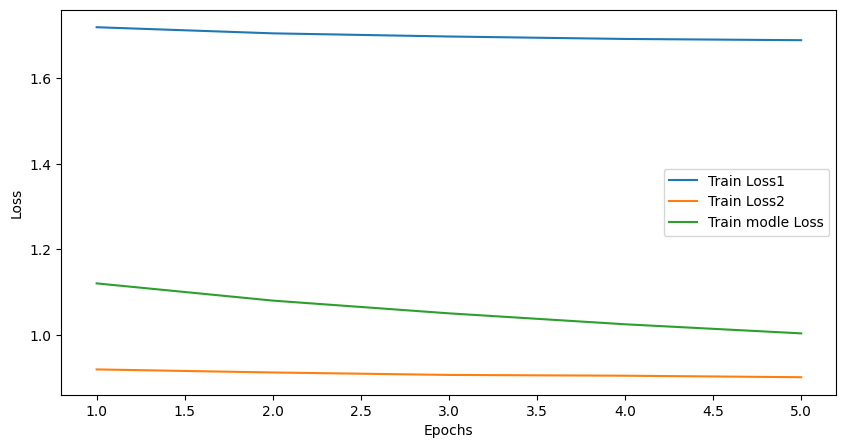

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_loss_list1, label='Train Loss1')
plt.plot(range(1, num_epochs+1), train_loss_list2, label='Train Loss2')
plt.plot(range(1, num_epochs+1), train_modle_loss_list, label='Train modle Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Bonus**
A known problem in this kind of architecture is overfitting.Overfitting occurs when the model learns to perform well on the training data but fails to generalize to unseen data. To address overfitting, we can apply Weight Decay (L2 Regularization).

In [47]:
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001, weight_decay=1e-7)

num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    Regularization_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer2.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        Regularization_loss += loss.item()
    Regularization_loss = Regularization_loss  / len(train_loader)

    print(f'Epoch {epoch + 1}/{num_epochs}, Regularization Loss2: {Regularization_loss}')

Epoch 1/5, Regularization Loss2: 1.9241172634732082
Epoch 2/5, Regularization Loss2: 1.9447088494630116
Epoch 3/5, Regularization Loss2: 1.9840774283079845
Epoch 4/5, Regularization Loss2: 1.9158260290275144
Epoch 5/5, Regularization Loss2: 2.0077228216868837
